In [17]:
# CS 5010 Project Code
#Michael Kastanowski(mrk9fx), Rehan Merchant (rm2bt), Matthew Nicklas (mmn4sv), Drake Wagner (dbw2tn)
#Group 15

In [18]:
#Query 1

In [19]:
import requests
import csv
from numpy import *
import pandas as pd

In [20]:
bat_df =pd.read_csv("Batting.csv")#import batting

In [21]:
list(bat_df.columns)#check batting variables

['playerID',
 'yearID',
 'stint',
 'teamID',
 'lgID',
 'G',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'SB',
 'CS',
 'BB',
 'SO',
 'IBB',
 'HBP',
 'SH',
 'SF',
 'GIDP']

In [22]:
pitch_df = pd.read_csv("Pitching.csv")#import pitching

In [23]:
list(pitch_df.columns)#check pitching variables

['playerID',
 'yearID',
 'stint',
 'teamID',
 'lgID',
 'W',
 'L',
 'G',
 'GS',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'ERA',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
 'SH',
 'SF',
 'GIDP']

In [24]:
sal_df = pd.read_csv("Salaries.csv")#import salary

In [25]:
sal_bat_1 =pd.merge(bat_df, sal_df, on =['playerID', 'yearID',  'teamID', 'lgID']) #merge with salary

In [26]:
sal_bat_fin=sal_bat_1[['playerID', 'yearID',  'teamID', 'lgID', 'R', 'H', '2B', '3B', 'HR', 'salary']].dropna() #final merge

In [27]:
sal_bat_fin

,playerID,yearID,teamID,lgID,R,H,2B,3B,HR,salary
1,agostju01,1985,CHA,AL,0.0,0.0,0.0,0.0,0.0,147500
2,aguaylu01,1985,PHI,NL,27.0,46.0,7.0,3.0,6.0,237000
4,allenne01,1985,SLN,NL,0.0,0.0,0.0,0.0,0.0,750000
5,almonbi01,1985,PIT,NL,33.0,66.0,17.0,0.0,6.0,255000
6,anderla02,1985,PHI,NL,1.0,0.0,0.0,0.0,0.0,250500
...,...,...,...,...,...,...,...,...,...,...
24621,zieglbr01,2015,ARI,NL,0.0,0.0,0.0,0.0,0.0,5000000
24622,zimmejo02,2015,WAS,NL,4.0,10.0,1.0,0.0,0.0,16500000
24623,zimmery01,2015,WAS,NL,43.0,86.0,25.0,1.0,16.0,14000000
24624,zobribe01,2015,OAK,AL,39.0,63.0,20.0,2.0,6.0,7500000


In [28]:
sal_pitch_1 =pd.merge(pitch_df, sal_df, on =['playerID', 'yearID',  'teamID', 'lgID']) #merge with salary

In [29]:
sal_pitch_fin =sal_pitch_1[['playerID', 'yearID',  'teamID', 'lgID', 'W', 'L' ,'R', 'H', 'ERA', 'salary']].dropna() #final merge
sal_pitch_fin

,playerID,yearID,teamID,lgID,W,L,R,H,ERA,salary
0,ackerji01,1985,TOR,AL,7,2,35,86,3.23,170000
1,agostju01,1985,CHA,AL,4,3,27,45,3.58,147500
2,alexado01,1985,TOR,AL,17,10,105,268,3.45,875000
3,allenne01,1985,SLN,NL,1,4,22,32,5.59,750000
4,anderla02,1985,PHI,NL,3,3,41,78,4.32,250500
...,...,...,...,...,...,...,...,...,...,...
11526,wrighst01,2015,BOS,AL,5,4,38,67,4.09,510500
11527,yateski01,2015,TBA,AL,1,0,18,23,7.97,512800
11528,youngch03,2015,KCA,AL,11,6,44,91,3.06,675000
11529,zieglbr01,2015,ARI,NL,0,3,17,48,1.85,5000000


In [30]:
sal_pitch_fin=sal_pitch_fin.rename(columns={ 'W': 'Wins', 'L':'Losses' ,'R':"Runs", 'H': 'Hits', 'ERA':'Earned Run Average', 'salary': 'Salary'})
#rename colums


In [31]:
sal_bat_fin = sal_bat_fin.rename(columns = {'R':'Runs', 'H':'Hits', '2B': 'Double Bases', '3B': 'Triple Bases', 'HR':'Homeruns','salary': 'Salary'})
#rename columns

In [32]:
sal_bat_fin.to_csv('Salary_Batting.csv',index=False) #save

In [33]:
sal_pitch_fin.to_csv('Salary_Pitching.csv', index =False)#save

In [34]:
#import important packages
%matplotlib inline
import requests
import csv
import numpy as np
import pandas
import pandas as pd

In [35]:
sal_bat = pd.read_csv('Salary_Batting.csv') #import batting statistics
sal_pitch = pd.read_csv('Salary_Pitching.csv') #import pitching statistics

In [36]:
#drop null values
#sal_bat = sal_bat.dropna
#sal_pitch = sal_pitch.dropna

In [37]:
def group_avg(df, group): #used to create average df
    avg_df= df.groupby(group).mean()
    return avg_df #creates plot of yearly means

def group_reg(df, group):
    group_df = (df, group)
    return group_df

def year_plot(df): #used to plot
    for column in df:
        df.plot(use_index=True, y = column, title = ('Average ' + str(column)+ ' over the years')) 
                #plots each column against the index(years)

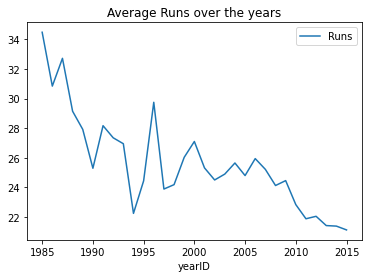

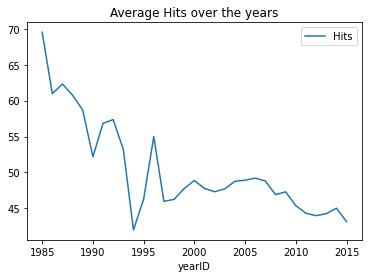

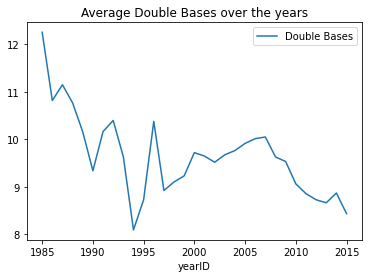

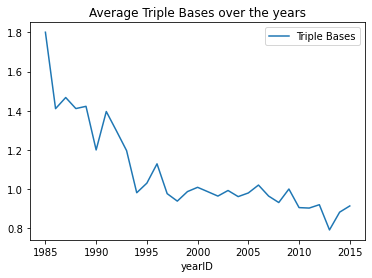

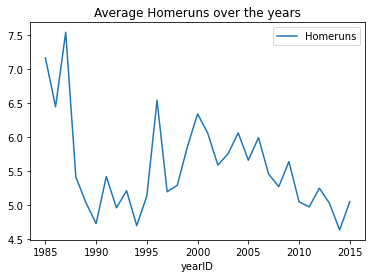

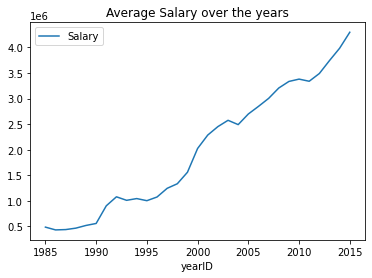

In [38]:
sal_bat.pipe(group_avg, 'yearID').pipe(year_plot) #plot batting statistics

In [39]:
# Average salary increases over the years but the average batting statistic drops over the years

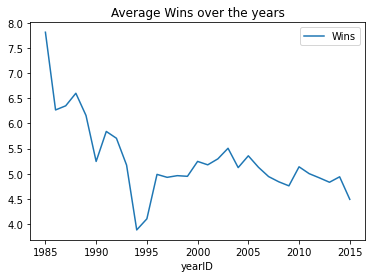

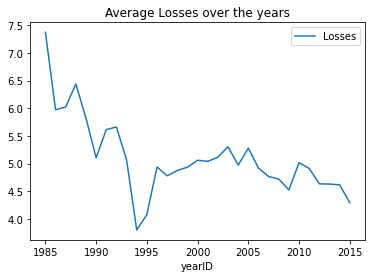

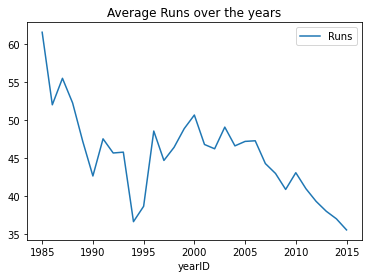

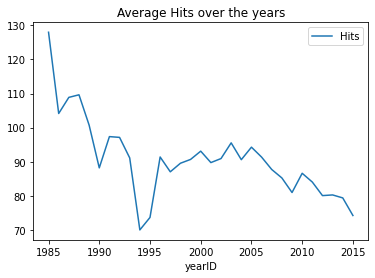

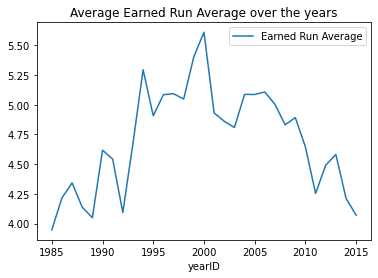

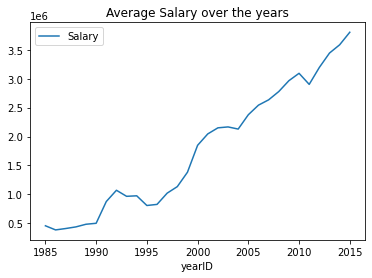

In [40]:
sal_pitch.pipe(group_avg, 'yearID').pipe(year_plot) #plot pitching statistics

In [41]:
# Average salary increases over the years but the average pitchingg statistic drops over the years with the exception of ERA

In [42]:
#Query 2

In [43]:
import matplotlib.pyplot as plt
from IPython.display import display

In [44]:
# Which active team has the most World Series Wins

In [45]:
#importing data in Pandas DF
batting = pd.read_csv('Batting.csv')
salaries = pd.read_csv('Salaries.csv')
teams = pd.read_csv('Teams.csv')
teamsFranchise = pd.read_csv('TeamsFranchises.csv')

In [46]:
#removing batting stats before 1985 since we dont have salary data for before 1985
indexBatting = batting[batting['yearID']<1985].index
batting.drop(indexBatting,inplace=True)

In [47]:
#which team has the most chamiponships out of the active teams today
#only WS winners
indexteams = teams[teams['WSWin']!='Y'].index
teams.drop(indexteams,inplace=True)

In [48]:
#keep only active teams
indexFranchise = teamsFranchise[teamsFranchise['active']!='Y'].index
teamsFranchise.drop(indexFranchise,inplace=True)

i = teamsFranchise.franchID.isin(teams.franchID)
print(i)
WSwinningteams = teamsFranchise[i]
WSwinningteams=WSwinningteams.drop('NAassoc',1)
WSwinningteams=WSwinningteams.drop('active',1)
WSwinningteams= WSwinningteams.set_index('franchID')
print(WSwinningteams)

1       True
2       True
4       True
5       True
13      True
25      True
28      True
29      True
31      True
37     False
40      True
43      True
46     False
53      True
56      True
61     False
62      True
71      True
74      True
75      True
80      True
83      True
92     False
93     False
94      True
99      True
103    False
104    False
107     True
118    False
Name: franchID, dtype: bool
                             franchName
franchID                               
ANA       Los Angeles Angels of Anaheim
ARI                Arizona Diamondbacks
ATL                      Atlanta Braves
BAL                   Baltimore Orioles
BOS                      Boston Red Sox
CHC                        Chicago Cubs
CHW                   Chicago White Sox
CIN                     Cincinnati Reds
CLE                   Cleveland Indians
DET                      Detroit Tigers
FLA                     Florida Marlins
KCR                  Kansas City Royals
LAD                 Lo

In [49]:
#groupby franchise ID
numWSwins =teams.groupby('franchID').size()
print(numWSwins)

#assigning WSWins to numWSwins
WSWinsAndTeams = WSwinningteams.assign(WSWins = numWSwins)
print(WSWinsAndTeams)

franchID
ANA     1
ARI     1
ATL     3
BAL     3
BOS     8
CHC     2
CHW     3
CIN     5
CLE     2
DET     4
DTN     1
FLA     2
KCR     2
LAD     6
MIN     3
NYM     2
NYY    27
OAK     9
PHI     2
PIT     5
PRO     1
SFG    10
STL    12
TOR     2
dtype: int64
                             franchName  WSWins
franchID                                       
ANA       Los Angeles Angels of Anaheim       1
ARI                Arizona Diamondbacks       1
ATL                      Atlanta Braves       3
BAL                   Baltimore Orioles       3
BOS                      Boston Red Sox       8
CHC                        Chicago Cubs       2
CHW                   Chicago White Sox       3
CIN                     Cincinnati Reds       5
CLE                   Cleveland Indians       2
DET                      Detroit Tigers       4
FLA                     Florida Marlins       2
KCR                  Kansas City Royals       2
LAD                 Los Angeles Dodgers       6
MIN               

Text(0.5, 1.0, 'Number of World Series Wins by Active Teams')

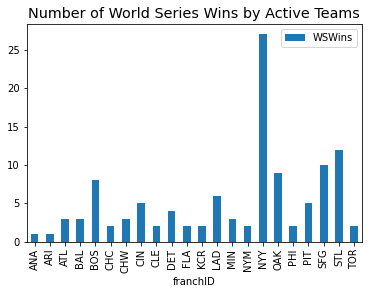

In [50]:
WSWinsAndTeams.plot.bar()
plt.style.use('ggplot')
plt.title('Number of World Series Wins by Active Teams')

In [51]:
#Query 3

In [52]:
# Which team won the world championship each year from 1985-2015 and how much salary they spent compared to the average?

In [53]:
#WS winning teams 1985 to 2015
print(teams)
teams1985_2015 = teams
teams1985_2015index = teams1985_2015[teams1985_2015['yearID']<1985].index
teams1985_2015.drop(teams1985_2015index, inplace = True)
print(teams1985_2015)
print(salaries)

      yearID lgID teamID franchID divID  Rank    G  Ghome   W   L  ...     DP  \
147     1884   NL    PRO      PRO   NaN     1  114    NaN  84  28  ...    NaN   
186     1886   AA    SL4      STL   NaN     1  139    NaN  93  46  ...    NaN   
195     1887   NL    DTN      DTN   NaN     1  127    NaN  79  45  ...    NaN   
215     1888   NL    NY1      SFG   NaN     1  138    NaN  84  47  ...    NaN   
231     1889   NL    NY1      SFG   NaN     1  131    NaN  83  43  ...    NaN   
...      ...  ...    ...      ...   ...   ...  ...    ...  ..  ..  ...    ...   
2680    2011   NL    SLN      STL     C     2  162   81.0  90  72  ...  167.0   
2709    2012   NL    SFN      SFG     W     1  162   81.0  94  68  ...  134.0   
2718    2013   AL    BOS      BOS     E     1  162   81.0  97  65  ...  142.0   
2769    2014   NL    SFN      SFG     W     2  162   81.0  88  74  ...  155.0   
2775    2015   AL    KCA      KCR     C     1  162   81.0  95  67  ...  138.0   

         FP                

In [54]:
# legue avg salaries by year
groupSalaries_avg = salaries.groupby('yearID').mean()
print(groupSalaries_avg)

              salary
yearID              
1985    4.762994e+05
1986    4.171470e+05
1987    4.347295e+05
1988    4.531711e+05
1989    5.063231e+05
1990    5.119737e+05
1991    8.949612e+05
1992    1.047521e+06
1993    9.769666e+05
1994    1.049589e+06
1995    9.649791e+05
1996    1.027909e+06
1997    1.218687e+06
1998    1.280845e+06
1999    1.485317e+06
2000    1.992985e+06
2001    2.279841e+06
2002    2.392527e+06
2003    2.573473e+06
2004    2.491776e+06
2005    2.633831e+06
2006    2.834521e+06
2007    2.941436e+06
2008    3.136517e+06
2009    3.277647e+06
2010    3.278747e+06
2011    3.318838e+06
2012    3.458421e+06
2013    3.723344e+06
2014    3.980446e+06
2015    4.301276e+06


In [55]:
# legue avg salaries by year
groupSalaries_avg = salaries.groupby('yearID').mean()
print(groupSalaries_avg)

              salary
yearID              
1985    4.762994e+05
1986    4.171470e+05
1987    4.347295e+05
1988    4.531711e+05
1989    5.063231e+05
1990    5.119737e+05
1991    8.949612e+05
1992    1.047521e+06
1993    9.769666e+05
1994    1.049589e+06
1995    9.649791e+05
1996    1.027909e+06
1997    1.218687e+06
1998    1.280845e+06
1999    1.485317e+06
2000    1.992985e+06
2001    2.279841e+06
2002    2.392527e+06
2003    2.573473e+06
2004    2.491776e+06
2005    2.633831e+06
2006    2.834521e+06
2007    2.941436e+06
2008    3.136517e+06
2009    3.277647e+06
2010    3.278747e+06
2011    3.318838e+06
2012    3.458421e+06
2013    3.723344e+06
2014    3.980446e+06
2015    4.301276e+06


In [56]:
#grouping salaries by year and team
grouped_multiple = salaries.groupby(['yearID', 'teamID']).agg({'salary':['mean']})
grouped_multiple.columns = grouped_multiple.columns.droplevel(-1)
print(grouped_multiple)

                     salary
yearID teamID              
1985   ATL     6.730455e+05
       BAL     5.254869e+05
       BOS     4.359024e+05
       CAL     5.152819e+05
       CHA     4.688656e+05
...                     ...
2015   SLN     4.586212e+06
       TBA     2.224870e+06
       TEX     4.791426e+06
       TOR     4.519696e+06
       WAS     5.365085e+06

[888 rows x 1 columns]


In [57]:
#merge both dataframes on yearID and teamID
avg_salary_WSWinning_teams =pd.merge(teams1985_2015, grouped_multiple, on =['yearID', 'teamID'])

In [58]:
#merge tables on yearID
avg_salary_WSWinning_teams_avg_league_salary = pd.merge(avg_salary_WSWinning_teams,groupSalaries_avg, on=['yearID'])
print(avg_salary_WSWinning_teams_avg_league_salary)

    yearID lgID teamID franchID divID  Rank    G  Ghome    W   L  ...  \
0     1985   AL    KCA      KCR     W     1  162   82.0   91  71  ...   
1     1986   NL    NYN      NYM     E     1  162   81.0  108  54  ...   
2     1987   AL    MIN      MIN     W     1  162   81.0   85  77  ...   
3     1988   NL    LAN      LAD     W     1  162   81.0   94  67  ...   
4     1989   AL    OAK      OAK     W     1  162   81.0   99  63  ...   
5     1990   NL    CIN      CIN     W     1  162   81.0   91  71  ...   
6     1991   AL    MIN      MIN     W     1  162   81.0   95  67  ...   
7     1992   AL    TOR      TOR     E     1  162   81.0   96  66  ...   
8     1993   AL    TOR      TOR     E     1  162   81.0   95  67  ...   
9     1995   NL    ATL      ATL     E     1  144   72.0   90  54  ...   
10    1996   AL    NYA      NYY     E     1  162   80.0   92  70  ...   
11    1997   NL    FLO      FLA     E     2  162   81.0   92  70  ...   
12    1998   AL    NYA      NYY     E     1  162   

Text(0.5, 1.0, 'Average Salary of player on \n World Series Winning Team vs League Average')

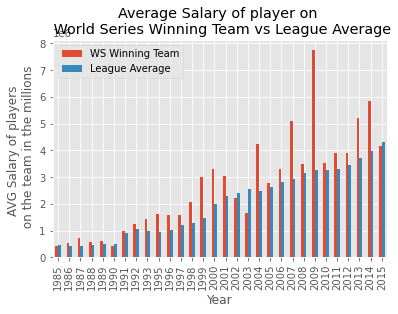

In [59]:
avg_salary_WSWinning_teams_avg_league_salary_plot = avg_salary_WSWinning_teams_avg_league_salary.plot(x="yearID", y=["salary_x", "salary_y"], kind="bar")
avg_salary_WSWinning_teams_avg_league_salary_plot.legend(["WS Winning Team", "League Average"])
plt.style.use('ggplot')
plt.ylabel('AVG Salary of players \n on the team in the millions')
plt.xlabel('Year')
title = 'Average Salary of player on \n World Series Winning Team vs League Average'
plt.title(title)

In [60]:
#create winners table
WinnerTable = avg_salary_WSWinning_teams_avg_league_salary[['yearID','franchID']]
display(WinnerTable)

,yearID,franchID
0,1985,KCR
1,1986,NYM
2,1987,MIN
3,1988,LAD
4,1989,OAK
5,1990,CIN
6,1991,MIN
7,1992,TOR
8,1993,TOR
9,1995,ATL


In [61]:
#Query 4

In [62]:
import csv
import pandas as pd
import numpy as np
import os

In [63]:
reg_pitch = pd.read_csv('Pitching.csv')
post_pitch = pd.read_csv('PitchingPost.csv')

In [64]:
reg_pitch.head()
len(reg_pitch)

44139

In [65]:
len(post_pitch)

5109

In [66]:
print(reg_pitch.columns.values)
print(post_pitch.columns.values)

['playerID' 'yearID' 'stint' 'teamID' 'lgID' 'W' 'L' 'G' 'GS' 'CG' 'SHO'
 'SV' 'IPouts' 'H' 'ER' 'HR' 'BB' 'SO' 'BAOpp' 'ERA' 'IBB' 'WP' 'HBP' 'BK'
 'BFP' 'GF' 'R' 'SH' 'SF' 'GIDP']
['playerID' 'yearID' 'round' 'teamID' 'lgID' 'W' 'L' 'G' 'GS' 'CG' 'SHO'
 'SV' 'IPouts' 'H' 'ER' 'HR' 'BB' 'SO' 'BAOpp' 'ERA' 'IBB' 'WP' 'HBP' 'BK'
 'BFP' 'GF' 'R' 'SH' 'SF' 'GIDP']


In [67]:
post_colnames = []
reg_colnames = []
for i in post_pitch.columns.values:
    post_colnames.append(i)
for i in reg_pitch.columns.values:
    reg_colnames.append(i)

post_colnames == reg_colnames is True #check if column names are the same. Since this returns False, there are some differences

False

In [68]:
differences = []
for i in post_colnames:
    if i not in reg_colnames:
        differences.append(i)
for i in reg_colnames:
    if i not in post_colnames:
        differences.append(i)
differences

# All this code is meant to do is tell which of the columns are different between the two datasets. Since we don't need this information for
# this query, we will drop these two columns. This is sort of an optional step just to further understand the data before wrangling into a smaller selection.

['round', 'stint']

In [69]:
post_new = post_pitch[['yearID', 'teamID', 'BB', 'ERA']]
reg_new = reg_pitch[['yearID', 'teamID', 'BB', 'ERA']] # In this selection, we keep only two numerical statistics: BB and ERA
# These are two important factors in determining a pitcher's efficiency: ERA is their earned run average, while BB is the rate at which
# batters will go to first base on a walk (four balls).

In [70]:
post_new['REG/POST'] = 'POST'
reg_new['REG/POST'] = 'REG'
# Add new column to differentiate between post season and preseason statistics before combining

<ipython-input-70-1ff8f2556536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_new['REG/POST'] = 'POST'
<ipython-input-70-1ff8f2556536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_new['REG/POST'] = 'REG'


In [71]:
post_new=post_new.dropna()
reg_new=reg_new.dropna() # drop NA values from the categories that we need data in

In [72]:
post_new.max()

yearID      2015
teamID       WS1
BB            32
ERA          inf
REG/POST    POST
dtype: object

In [73]:
post_new.sort_values(by='ERA')

,yearID,teamID,BB,ERA,REG/POST
1958,1990,PIT,0,0.0,POST
2183,1995,CLE,2,0.0,POST
2184,1995,CLE,0,0.0,POST
2186,1995,CLE,2,0.0,POST
2188,1995,CLE,1,0.0,POST
...,...,...,...,...,...
5050,2015,KCA,0,108.0,POST
4829,2014,DET,0,108.0,POST
1389,1979,PIT,2,108.0,POST
4402,2011,ARI,2,108.0,POST


In [74]:
reg_new=reg_new[reg_new.ERA != 'inf'] # drop rows with inf ERA

In [75]:
post_new=post_new[post_new.ERA != 'inf']
post_new=post_new.drop(4991)

In [76]:
print('Since 1884, the average MLB regular season ERA is: ', reg_new['ERA'].mean(), sep='')
print('Since 1884, the average MLB post season ERA is: ', post_new['ERA'].mean(), sep='')

Since 1884, the average MLB regular season ERA is: 5.070029058548439
Since 1884, the average MLB post season ERA is: 4.7373822314049745


In [77]:
print('Since 1884, the average MLB regular season BB (walks) per pitcher per game is:', reg_new['BB'].mean())
print('Since 1884, the average MLB post season BB (walks) per pitcher per game is:', post_new['BB'].mean())
print('')
print('It makes sense that the regular season BB is higher than the postseason BB (walks). Because this stat is not a percentage like ERA, numbers will likely steadily increase over time.\
 Since there are more games played per player on average in the regular season, that means that the totals of them walking batters are much more likely to be higher.')

Since 1884, the average MLB regular season BB (walks) per pitcher per game is: 30.180390020204772
Since 1884, the average MLB post season BB (walks) per pitcher per game is: 1.9291322314049586

It makes sense that the regular season BB is higher than the postseason BB (walks). Because this stat is not a percentage like ERA, numbers will likely steadily increase over time. Since there are more games played per player on average in the regular season, that means that the totals of them walking batters are much more likely to be higher.


In [78]:
# groupby year and average era...

In [79]:
post_by_year = post_new.groupby(by='yearID', dropna=False).mean()
reg_by_year = reg_new.groupby(by='yearID', dropna=False).mean()

<AxesSubplot:title={'center':'Regular Season Stats by Year'}, xlabel='yearID'>

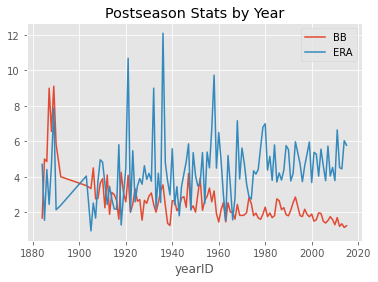

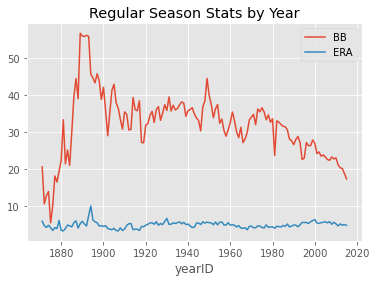

In [80]:
post_by_year.plot(title='Postseason Stats by Year')
reg_by_year.plot(title='Regular Season Stats by Year')

In [81]:
both=pd.merge(reg_by_year, post_by_year, on=['yearID']) # combine into one df
both.columns=['BB_reg', 'ERA_reg', 'BB_post', 'ERA_post']
both

,BB_reg,ERA_reg,BB_post,ERA_post
yearID,,,,
1884,21.051064,4.751234,1.666667,4.700000
1885,29.906780,4.467966,5.000000,1.542500
1886,39.524823,5.598369,4.857143,4.410000
1887,44.492647,6.092941,9.000000,2.436667
1888,39.057851,4.159339,6.555556,4.670000
...,...,...,...,...
2011,21.241867,4.713847,1.693333,6.645267
2012,20.399445,5.274563,1.201149,4.515690
2013,20.216851,4.920207,1.343558,4.443190


In [82]:
del both['BB_reg']
del both['BB_post']

<AxesSubplot:xlabel='yearID'>

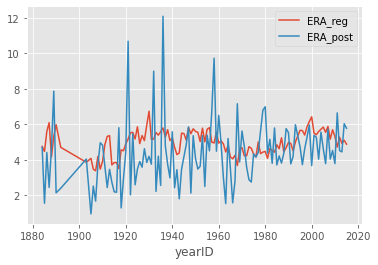

In [83]:
both.plot() # plot showing ERAs in regular season vs. post season

In [84]:
both=pd.merge(reg_by_year, post_by_year, on=['yearID']) # combine into one df
both.columns=['BB_reg', 'ERA_reg', 'BB_post', 'ERA_post']
del both['ERA_reg']
del both['ERA_post']
both

,BB_reg,BB_post
yearID,,
1884,21.051064,1.666667
1885,29.906780,5.000000
1886,39.524823,4.857143
1887,44.492647,9.000000
1888,39.057851,6.555556
...,...,...
2011,21.241867,1.693333
2012,20.399445,1.201149
2013,20.216851,1.343558


<AxesSubplot:xlabel='yearID'>

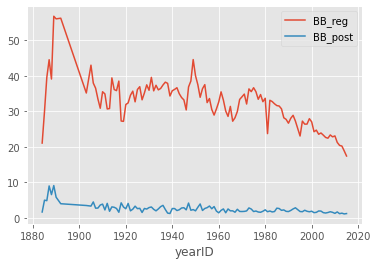

In [85]:
both.plot() # total BB over the years

In [86]:
del both['BB_reg']

<AxesSubplot:xlabel='yearID'>

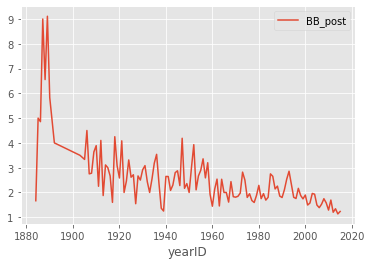

In [87]:
both.plot() # just postseason walks